In [ ]:
# Stress detection using smart[hone softkeyboard

# Student Name: Sachleen Singh Chani
# Student ID:   x22244778

# Course:  Machine Leaning (MSCAI1) 

In [2]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

from tensorflow.keras.models import Sequential
#from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD, RMSprop

from tensorflow.keras.callbacks import EarlyStopping

# To gbm light
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB

from statistics import stdev


# dataset creation


In [2]:
calm_path = "2019_stress_detection_dataset\\CALM\\"
stress_path = "2019_stress_detection_dataset\\STRESS\\"

In [3]:
# reading calm files
calm_df = pd.DataFrame()

for i in range(1,111):
    for j in range(1, 8):
        file_path = calm_path + f"CALM_{i}_{j}.csv"
        try:
            #if os.path.exists(file_path):
            df = pd.read_csv(file_path, sep=";",header=None)
            calm_df = pd.concat([calm_df, df], axis=0)
            #else:
            #    print(f"File {file_path} does not exist.")
        except FileNotFoundError:
            print(f"File {file_path} not found.")

File 2019_stress_detection_dataset\CALM\CALM_1_6.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_1_7.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_2_6.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_2_7.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_3_6.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_3_7.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_4_6.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_4_7.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_5_6.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_5_7.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_6_5.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_6_6.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_6_7.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_7_6.csv not found.
File 2019_stress_detection_dataset\CALM\CALM_7_7.csv not found.
File 2019_stress_detection_dataset\CALM\

In [4]:
stress_df = pd.DataFrame()

for i in range(1,111):
    for j in range(1, 8):
        file_path = stress_path + f"STRESS_{i}_{j}.csv"
        try:
            #if os.path.exists(file_path):
            df = pd.read_csv(file_path, sep=";",header=None)
            stress_df = pd.concat([stress_df, df], axis=0)
            #else:
            #    print(f"File {file_path} does not exist.")
        except FileNotFoundError:
            print(f"File {file_path} not found.")


File 2019_stress_detection_dataset\STRESS\STRESS_1_6.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_1_7.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_2_6.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_2_7.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_3_6.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_3_7.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_4_6.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_4_7.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_5_6.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_5_7.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_6_6.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_6_7.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_7_6.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS_7_7.csv not found.
File 2019_stress_detection_dataset\STRESS\STRESS

In [52]:
calm_df1 = calm_df.iloc[:,:]
stress_df1 = stress_df.iloc[:,:]

In [53]:

# dropping columns not needed

calm_df1.drop([0, 5, 45, 46, 44], axis = 1, inplace = True)
stress_df1.drop([0, 5, 45, 46, 44], axis = 1, inplace = True)


In [62]:
print("calm:", calm_df1.shape)
print("stress:", stress_df1.shape)

calm: (704399, 42)
stress: (835973, 42)


In [56]:
# combining rows to reduce the rows
# combining 100 rows so 5 secs worth data in a single row

row_count = 100  # Change this value to control how many rows to stack horizontally

# Calculate the number of rows to add
num_rows_to_add = row_count - (len(calm_df1) % row_count)

# Generate NaN values for the new rows
new_rows_data = pd.DataFrame({col: [np.nan] * num_rows_to_add for col in calm_df1.columns})

# Append the new rows to the DataFrame
# padding NaN
# this is to make the rows in the dataframe a multiple of the row_count
calm_combine_df = pd.concat([calm_df1, new_rows_data], ignore_index=True)

n = len(calm_combine_df)
# Calculate the number of resulting columns
num_columns = calm_combine_df.shape[1] * row_count

# Reshape the DataFrame into desired shape
reshaped_values = np.reshape(calm_combine_df.values, (-1, row_count, calm_combine_df.shape[1]))
column_names = [f'{col}_{i}' for i in range(row_count) for col in calm_combine_df.columns]
calm_combine_df = pd.DataFrame(reshaped_values.reshape(-1, num_columns), columns=column_names)


In [57]:
# combining rows to reduce the rows
# combining 100 rows so 5 secs worth data in a single row

#row_count = 5  # Change this value to control how many rows to stack horizontally

# Calculate the number of rows to add
num_rows_to_add = row_count - (len(stress_df1) % row_count)

# Generate NaN values for the new rows
new_rows_data = pd.DataFrame({col: [np.nan] * num_rows_to_add for col in stress_df1.columns})

# Append the new rows to the DataFrame
# padding NaN
# this is to make the rows in the dataframe a multiple of the row_count
stress_combine_df = pd.concat([stress_df1, new_rows_data], ignore_index=True)

n = len(stress_combine_df)
# Calculate the number of resulting columns
num_columns = stress_combine_df.shape[1] * row_count

# Reshape the DataFrame into desired shape
reshaped_values = np.reshape(stress_combine_df.values, (-1, row_count, stress_combine_df.shape[1]))
column_names = [f'{col}_{i}' for i in range(row_count) for col in stress_combine_df.columns]
stress_combine_df = pd.DataFrame(reshaped_values.reshape(-1, num_columns), columns=column_names)


In [64]:
# target column
stress_combine_df['target']='S'
calm_combine_df['target']='C'


In [65]:
print("stress:", stress_combine_df.shape)
print("calm", calm_combine_df.shape)

stress: (8360, 4201)
calm (7044, 4201)


In [66]:

# combining the stress and the calm dataframes together
# ignoring the index and creating a new indexing

combined_df = pd.concat([stress_combine_df, calm_combine_df], axis = 0, ignore_index = True)


In [3]:
# combined_df = pd.read_csv("stress_calm_combined_dataset.csv")

In [8]:
# combined_df.drop(columns = ["43"],inplace = True)

In [ ]:
#combined_df1 = pd.DataFrame()
#for col in combined_df.columns:
#    combined_df1[col] = combined_df[col].astype(float)

In [118]:

# remove null value rows
#combined_df.dropna(inplace = True, axis = 0)

print("Null value count:", combined_df.isnull().sum().sum(), "\n\n")
print(combined_df.info())

Null value count: 0 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15402 entries, 0 to 15401
Columns: 4201 entries, 1_0 to target
dtypes: float64(4100), int64(100), object(1)
memory usage: 493.7+ MB
None


In [108]:
# combined dataset
display(combined_df)

,1_0,2_0,3_0,4_0,6_0,7_0,8_0,9_0,10_0,11_0,...,35_99,36_99,37_99,38_99,39_99,40_99,41_99,42_99,43_99,target
0,30.0,1.0,1.0,0.0,27.0,-0.505169,4.584610,8.654279,9.806650,-0.505169,...,-0.286381,0.925547,0.174533,1.015117,33.013030,-28.199623,-5.462337,43.759754,14.0,1.0
1,30.0,1.0,6.0,0.0,27.0,-0.855542,4.732930,8.483661,9.752183,-0.933509,...,-0.323044,0.909478,0.174533,1.015117,39.167664,-30.342365,0.213621,49.546043,14.0,1.0
2,30.0,1.0,10.0,0.0,27.0,-0.047479,4.653396,7.789553,9.073780,0.036563,...,-0.319533,0.913167,0.174533,1.015117,38.223083,-29.286270,-1.333966,48.171250,14.0,1.0
3,30.0,1.0,15.0,0.0,27.0,-0.391895,4.711204,8.981483,10.149683,-0.228299,...,-0.295406,0.915288,0.174533,1.015117,34.622253,-31.549316,-4.077767,47.017956,14.0,1.0
4,30.0,1.0,21.0,0.0,27.0,-0.634820,5.042921,8.471726,9.879483,-0.697355,...,-0.304992,0.918151,0.174533,1.015117,35.866670,-29.122353,-3.403648,46.326168,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,21.0,1.0,45.0,6.0,71.0,0.543500,6.359194,7.546754,9.883736,0.391518,...,0.748220,0.563671,0.000000,0.999999,252.835270,-40.727386,4.840062,256.140230,0.0,0.0
15399,21.0,1.0,52.0,6.0,71.0,0.459701,6.213143,8.200391,10.298587,0.627046,...,0.745329,0.544084,0.000000,0.999999,252.074680,-45.319305,0.774670,256.117300,0.0,0.0
15400,21.0,1.0,58.0,6.0,71.0,-0.347170,6.900300,7.733508,10.370237,0.093229,...,0.743197,0.562262,0.000000,0.999999,253.108890,-42.319200,4.657597,256.664600,0.0,0.0
15401,21.0,1.0,68.0,6.0,71.0,0.543500,6.385531,6.677632,9.255332,0.588795,...,0.757537,0.550680,0.000000,0.999999,251.594000,-41.008400,1.832259,254.920730,0.0,0.0


In [72]:
# Encode the 'gender' column using LabelEncoder
enc = LabelEncoder()

# Assuming `combined_df` is your DataFrame containing columns from gender_0 to gender_99
for i in range(100):  # Assuming you have 100 columns from gender_0 to gender_99
    column_name = f'2_{i}'  # Construct the column name
    if column_name in combined_df.columns:
        combined_df[column_name] = enc.fit_transform(combined_df[column_name])

# Check the DataFrame after label encoding
display(combined_df.head())

,1_0,2_0,3_0,4_0,6_0,7_0,8_0,9_0,10_0,11_0,...,35_99,36_99,37_99,38_99,39_99,40_99,41_99,42_99,43_99,target
0,30.0,1,1.0,0.0,27.0,-0.505169,4.58461,8.654279,9.80665,-0.505169,...,-0.286381,0.925547,0.174533,1.015117,33.01303,-28.199623,-5.462337,43.759754,14.0,S
1,30.0,1,6.0,0.0,27.0,-0.855542,4.73293,8.483661,9.752183,-0.933509,...,-0.323044,0.909478,0.174533,1.015117,39.167664,-30.342365,0.213621,49.546043,14.0,S
2,30.0,1,10.0,0.0,27.0,-0.047479,4.653396,7.789553,9.07378,0.036563,...,-0.319533,0.913167,0.174533,1.015117,38.223083,-29.28627,-1.333966,48.17125,14.0,S
3,30.0,1,15.0,0.0,27.0,-0.391895,4.711204,8.981483,10.149683,-0.228299,...,-0.295406,0.915288,0.174533,1.015117,34.622253,-31.549316,-4.077767,47.017956,14.0,S
4,30.0,1,21.0,0.0,27.0,-0.63482,5.042921,8.471726,9.879483,-0.697355,...,-0.304992,0.918151,0.174533,1.015117,35.86667,-29.122353,-3.403648,46.326168,14.0,S


In [73]:
# Print the mapping between original categorical values and numerical labels
print("Mapping of original values to numerical labels:")
for original_value, numerical_label in zip(enc.classes_, enc.transform(enc.classes_)):
    print(f"{original_value}: {numerical_label}")

Mapping of original values to numerical labels:
Female: 0
Male: 1


In [6]:
# Encode the 'target' column using LabelEncoder
enc = LabelEncoder()

column_name = f'target'  # Construct the column name

combined_df[column_name] = enc.fit_transform(combined_df[column_name])

# Check the DataFrame after label encoding
display(combined_df.head())

,1_0,2_0,3_0,4_0,6_0,7_0,8_0,9_0,10_0,11_0,...,35_99,36_99,37_99,38_99,39_99,40_99,41_99,42_99,43_99,target
0,30.0,1,1.0,0.0,27.0,-0.505169,4.584610,8.654279,9.806650,-0.505169,...,-0.286381,0.925547,0.174533,1.015117,33.013030,-28.199623,-5.462337,43.759754,14.0,1
1,30.0,1,6.0,0.0,27.0,-0.855542,4.732930,8.483661,9.752183,-0.933509,...,-0.323044,0.909478,0.174533,1.015117,39.167664,-30.342365,0.213621,49.546043,14.0,1
2,30.0,1,10.0,0.0,27.0,-0.047479,4.653396,7.789553,9.073780,0.036563,...,-0.319533,0.913167,0.174533,1.015117,38.223083,-29.286270,-1.333966,48.171250,14.0,1
3,30.0,1,15.0,0.0,27.0,-0.391895,4.711204,8.981483,10.149683,-0.228299,...,-0.295406,0.915288,0.174533,1.015117,34.622253,-31.549316,-4.077767,47.017956,14.0,1
4,30.0,1,21.0,0.0,27.0,-0.634820,5.042921,8.471726,9.879483,-0.697355,...,-0.304992,0.918151,0.174533,1.015117,35.866670,-29.122353,-3.403648,46.326168,14.0,1


In [7]:
# Print the mapping between original categorical values and numerical labels
print("Mapping of original values to numerical labels:")
for original_value, numerical_label in zip(enc.classes_, enc.transform(enc.classes_)):
    print(f"{original_value}: {numerical_label}")

Mapping of original values to numerical labels:
C: 0
S: 1


In [8]:
print("combined_df:", combined_df.shape)

display(combined_df)

combined_df: (15402, 4201)


,1_0,2_0,3_0,4_0,6_0,7_0,8_0,9_0,10_0,11_0,...,35_99,36_99,37_99,38_99,39_99,40_99,41_99,42_99,43_99,target
0,30.0,1,1.0,0.0,27.0,-0.505169,4.584610,8.654279,9.806650,-0.505169,...,-0.286381,0.925547,0.174533,1.015117,33.013030,-28.199623,-5.462337,43.759754,14.0,1
1,30.0,1,6.0,0.0,27.0,-0.855542,4.732930,8.483661,9.752183,-0.933509,...,-0.323044,0.909478,0.174533,1.015117,39.167664,-30.342365,0.213621,49.546043,14.0,1
2,30.0,1,10.0,0.0,27.0,-0.047479,4.653396,7.789553,9.073780,0.036563,...,-0.319533,0.913167,0.174533,1.015117,38.223083,-29.286270,-1.333966,48.171250,14.0,1
3,30.0,1,15.0,0.0,27.0,-0.391895,4.711204,8.981483,10.149683,-0.228299,...,-0.295406,0.915288,0.174533,1.015117,34.622253,-31.549316,-4.077767,47.017956,14.0,1
4,30.0,1,21.0,0.0,27.0,-0.634820,5.042921,8.471726,9.879483,-0.697355,...,-0.304992,0.918151,0.174533,1.015117,35.866670,-29.122353,-3.403648,46.326168,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,21.0,1,45.0,6.0,71.0,0.543500,6.359194,7.546754,9.883736,0.391518,...,0.748220,0.563671,0.000000,0.999999,252.835270,-40.727386,4.840062,256.140230,0.0,0
15398,21.0,1,52.0,6.0,71.0,0.459701,6.213143,8.200391,10.298587,0.627046,...,0.745329,0.544084,0.000000,0.999999,252.074680,-45.319305,0.774670,256.117300,0.0,0
15399,21.0,1,58.0,6.0,71.0,-0.347170,6.900300,7.733508,10.370237,0.093229,...,0.743197,0.562262,0.000000,0.999999,253.108890,-42.319200,4.657597,256.664600,0.0,0
15400,21.0,1,68.0,6.0,71.0,0.543500,6.385531,6.677632,9.255332,0.588795,...,0.757537,0.550680,0.000000,0.999999,251.594000,-41.008400,1.832259,254.920730,0.0,0


In [9]:
# checking balanced target

print("target count ratio:")
print(combined_df["target"].value_counts()/len(combined_df))


target count ratio:
target
1    0.542722
0    0.457278
Name: count, dtype: float64


In [95]:
# saving created dataset to csv file
combined_df.to_csv('combined_dataset_5sec.csv', index=False)

In [3]:
# loading csv file
combined_df = pd.read_csv("combined_dataset_5sec.csv")

# EDA

In [ ]:
palette = ["#ADD8E6","#EFB000"]

# ML models

In [10]:
X = combined_df.drop('target', axis = 1)
y = combined_df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

## Random Forest

Accuracy: 0.9649464459591042

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1403
           1       0.97      0.96      0.97      1678

    accuracy                           0.96      3081
   macro avg       0.96      0.97      0.96      3081
weighted avg       0.97      0.96      0.96      3081

Confusion Matrix:


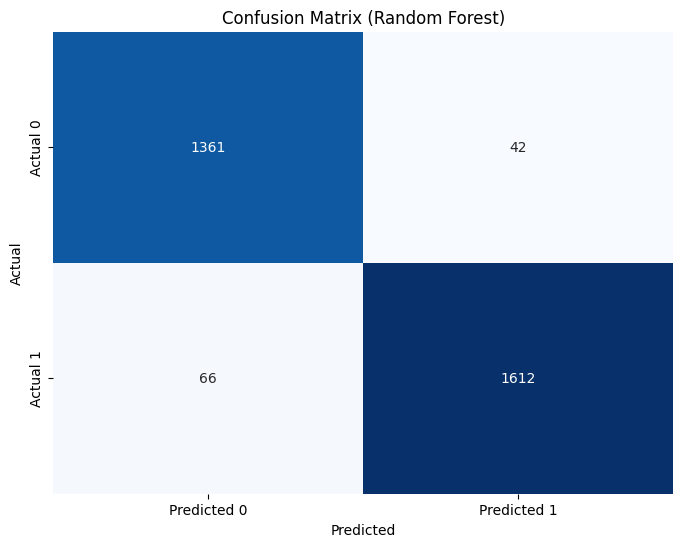

In [16]:
# Random Forest


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=50)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = (rf_predictions == y_test).mean()
print("Accuracy:", rf_accuracy)


# Generate classification report
rf_class_report = classification_report(y_test, rf_predictions)
print("\nClassification Report (Random Forest):")
print(rf_class_report)

# Generate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:")
#print(rf_conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()


In [135]:
# # 10 fold using randomforest
# import pandas as pd
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier 


# # Initialize the classifier
# clf = RandomForestClassifier(n_estimators=300, max_depth=50) 

# # Initialize KFold with 10 folds
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Perform cross-validation
# cv_scores = cross_val_score(clf, X, y, cv=kf)

# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Average Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.96430889 0.96950032 0.97337662 0.96558442 0.95909091 0.96948052
 0.97012987 0.96428571 0.96038961 0.97792208]
Average Cross-Validation Score: 0.9674068955055326


In [17]:
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the evaluation metrics
scoring = {
    'acc': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc',
    'log_loss': 'neg_log_loss'
}

# Perform cross-validation
rf_scores = cross_validate(rf_classifier, X, y, scoring=scoring, cv=kf, return_train_score=True)

# Print the keys and test scores
print(rf_scores.keys())
print("Accuracy for each fold:", rf_scores['test_acc'])
print("Precision for each fold:", rf_scores['test_precision'])
print("Recall for each fold:", rf_scores['test_recall'])
print("F1-score for each fold:", rf_scores['test_f1'])
print("ROC AUC for each fold:", rf_scores['test_roc_auc'])
print("Log Loss for each fold:", -rf_scores['test_log_loss'])

dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1', 'test_roc_auc', 'train_roc_auc', 'test_log_loss', 'train_log_loss'])
Accuracy for each fold: [0.96397274 0.96786758 0.95779221 0.96461039 0.96818182]
Precision for each fold: [0.96321466 0.96702132 0.95633974 0.96379321 0.96746165]
Recall for each fold: [0.96435507 0.96894297 0.96034581 0.96574325 0.96898408]
F1-score for each fold: [0.9637301  0.96773432 0.95754717 0.96447945 0.96805769]
ROC AUC for each fold: [0.99604309 0.9959169  0.99526342 0.99604276 0.99608654]
Log Loss for each fold: [0.17076828 0.17135246 0.17984224 0.17845339 0.17555151]


In [ ]:
print("Average Accuracy:", rf_scores['test_acc'].mean())
print("Average Precision:", rf_scores['test_precision'].mean())
print("Average Recall:", rf_scores['test_recall'].mean())
print("Average F1-score:", rf_scores['test_f1'].mean())
print("Average ROC AUC:", rf_scores['test_roc_auc'].mean())
print("Average Log Loss:", -rf_scores['test_log_loss'].mean())

Evaluation of Random Forest: 



Precision: 0.9746070133010882
Recall (Sensitivity): 0.9606674612634089
F1-score: 0.9675870348139256
ROC AUC: 0.995650814659885
Average Precision: 0.9963952056785421
Log Loss: 0.17553851242712698


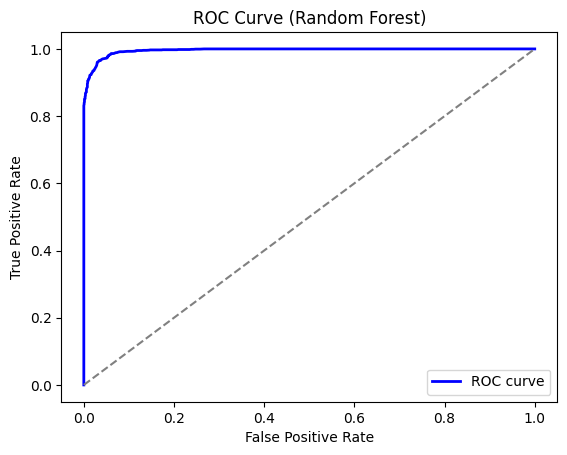

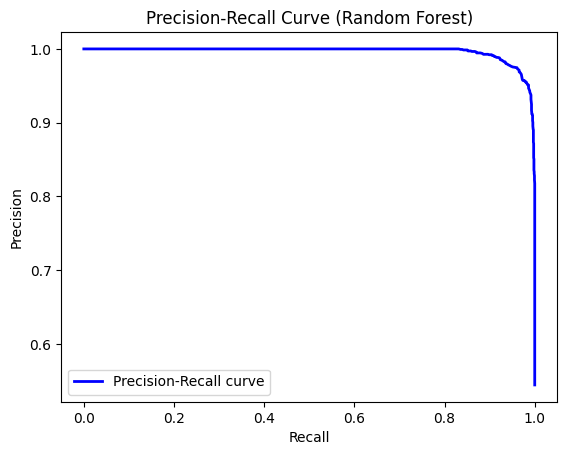

In [18]:
# evaluation
print("Evaluation of Random Forest: \n")


from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve


precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:,1])
average_precision = average_precision_score(y_test, rf_classifier.predict_proba(X_test)[:,1])
logloss = log_loss(y_test, rf_classifier.predict_proba(X_test))


# Print the calculated metrics
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)
print("Log Loss:", logloss)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend(loc='lower left')
plt.show()

In [ ]:
#checking for overfitting

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    rf_classifier, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [ ]:
# # GNB gaussian


# # Create a Gaussian Naive Bayes classifier
# gnb_classifier = GaussianNB()

# # Train the classifier on the training data
# gnb_classifier.fit(X_train, y_train)

# # Predict on the test data
# gnb_predictions = gnb_classifier.predict(X_test)

# # Generate confusion matrix
# gnb_conf_matrix = confusion_matrix(y_test, gnb_predictions)
# print("Confusion Matrix:")
# #print(gnb_conf_matrix)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(gnb_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=["Predicted 0", "Predicted 1"], 
#             yticklabels=["Actual 0", "Actual 1"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix (Gaussian Naive Bayes)")
# plt.show()

# # Generate classification report
# gnb_class_report = classification_report(y_test, gnb_predictions)
# print("\nClassification Report (Gaussian Naive Bayes):")
# print(gnb_class_report)

In [ ]:
# # logistic regression

# from sklearn.linear_model import LogisticRegression

# # Create a Logistic Regression classifier
# log_reg_classifier = LogisticRegression()

# # Train the classifier on the training data
# log_reg_classifier.fit(X_train, y_train)

# # Predict on the test data
# log_reg_predictions = log_reg_classifier.predict(X_test)

# # Generate confusion matrix
# log_reg_conf_matrix = confusion_matrix(y_test, log_reg_predictions)
# print("Confusion Matrix:")
# #print(log_reg_conf_matrix)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(log_reg_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=["Predicted 0", "Predicted 1"], 
#             yticklabels=["Actual 0", "Actual 1"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix (Logistic Regression)")
# plt.show()


# # Generate classification report
# log_reg_class_report = classification_report(y_test, log_reg_predictions)
# print("\nClassification Report (Logistic Regression):")
# print(log_reg_class_report)

In [ ]:
# # encoding target to numerical
# enc_target = LabelEncoder()

# # Assuming `combined_df` is your DataFrame containing columns from target
# column_name = "target"
# combined_df[column_name] = enc_target.fit_transform(combined_df[column_name])

# # Print the mapping between original categorical values and numerical labels
# print("Mapping of original values to numerical labels:")
# for original_value, numerical_label in zip(enc_target.classes_, enc_target.transform(enc_target.classes_)):
#     print(f"{original_value}: {numerical_label}")

## LGBM

[LightGBM] [Info] Number of positive: 6681, number of negative: 5640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.134304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869617
[LightGBM] [Info] Number of data points in the train set: 12321, number of used features: 4200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542245 -> initscore=0.169384
[LightGBM] [Info] Start training from score 0.169384
Validation Accuracy: 0.9746835443037974
Confusion Matrix:


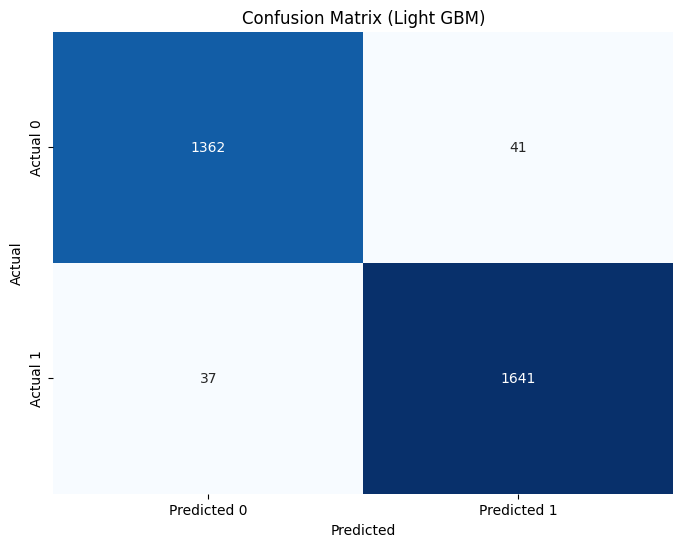

Classification Report (Light GBM):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1403
           1       0.98      0.98      0.98      1678

    accuracy                           0.97      3081
   macro avg       0.97      0.97      0.97      3081
weighted avg       0.97      0.97      0.97      3081



In [19]:
# Light GBM classifier
lgbm = LGBMClassifier(n_estimators=500, random_state=42)

lgbm.fit(X_train, y_train)

# Make predictions
lgbm_y_test_pred = lgbm.predict(X_test)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_test, lgbm_y_test_pred)
print("Validation Accuracy:", lgbm_accuracy)

# Confusion Matrix
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_y_test_pred)
print("Confusion Matrix:")
#print(lgbm_conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lgbm_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Light GBM)")
plt.show()


# Classification Report
lgbm_class_report = classification_report(y_test, lgbm_y_test_pred)
print("Classification Report (Light GBM):")
print(lgbm_class_report)

In [20]:
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the evaluation metrics
scoring = {
    'acc': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc',
    'log_loss': 'neg_log_loss'
}

# Perform cross-validation
lgbm_scores = cross_validate(lgbm, X, y, scoring=scoring, cv=kf, return_train_score=True)

# Print the keys and test scores
print(lgbm_scores.keys())
print("Accuracy for each fold:", lgbm_scores['test_acc'])
print("Precision for each fold:", lgbm_scores['test_precision'])
print("Recall for each fold:", lgbm_scores['test_recall'])
print("F1-score for each fold:", lgbm_scores['test_f1'])
print("ROC AUC for each fold:", lgbm_scores['test_roc_auc'])
print("Log Loss for each fold:", -lgbm_scores['test_log_loss'])

print("Average Accuracy:", lgbm_scores['test_acc'].mean())
print("Average Precision:", lgbm_scores['test_precision'].mean())
print("Average Recall:", lgbm_scores['test_recall'].mean())
print("Average F1-score:", lgbm_scores['test_f1'].mean())
print("Average ROC AUC:", lgbm_scores['test_roc_auc'].mean())
print("Average Log Loss:", -lgbm_scores['test_log_loss'].mean())

[LightGBM] [Info] Number of positive: 6681, number of negative: 5640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.895431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869617
[LightGBM] [Info] Number of data points in the train set: 12321, number of used features: 4200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542245 -> initscore=0.169384
[LightGBM] [Info] Start training from score 0.169384
[LightGBM] [Info] Number of positive: 6695, number of negative: 5626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.174004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869800
[LightGBM] [Info] Number of data points in the train set: 12321, number of used features: 4200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543381 -> initscore=0.173962
[LightGBM] [Info] Start training from score 0.173962
[LightGBM] [

Evaluation of Light GBM: 

Precision: 0.9756242568370987
Recall (Sensitivity): 0.9779499404052443
F1-score: 0.9767857142857143
ROC AUC: 0.9974887797899443
Average Precision: 0.9979917775449086
Log Loss: 0.06318648541883247


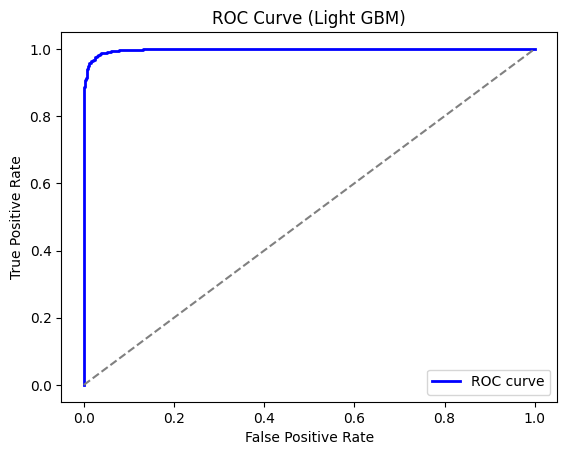

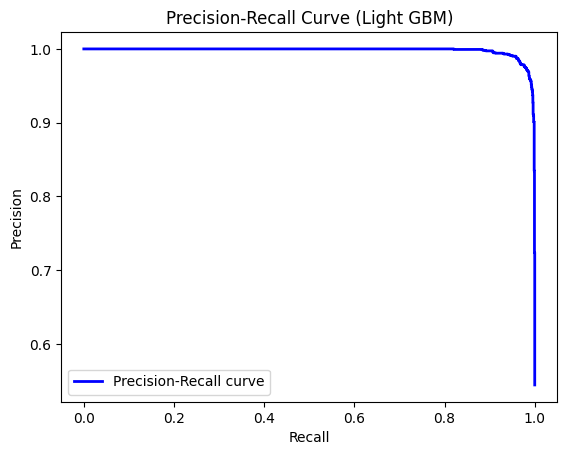

In [22]:
# evaluation
print("Evaluation of Light GBM: \n")


from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve


precision = precision_score(y_test, lgbm_y_test_pred)
recall = recall_score(y_test, lgbm_y_test_pred)
f1 = f1_score(y_test, lgbm_y_test_pred)
roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
average_precision = average_precision_score(y_test, lgbm.predict_proba(X_test)[:,1])
logloss = log_loss(y_test, lgbm.predict_proba(X_test))


# Print the calculated metrics
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)
print("Log Loss:", logloss)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lgbm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Light GBM)')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, lgbm.predict_proba(X_test)[:,1])
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Light GBM)')
plt.legend(loc='lower left')
plt.show()

## AdaBoost (!!!not used!!!)

In [ ]:
# # AdaBoost

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import pandas as pd


# # Initialize AdaBoostClassifier
# adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# # Train the classifier
# adaboost_clf.fit(X_train, y_train)

# # Predict on the test set
# adaboost_y_pred = adaboost_clf.predict(X_test)

# # Calculate accuracy
# adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
# print("Accuracy:", adaboost_accuracy)

# # Assuming you've already trained the AdaBoostClassifier and made predictions
# # adaboost_clf.fit(X_train, y_train)
# # y_pred = adaboost_clf.predict(X_test)

# # Confusion Matrix
# adaboost_conf_matrix = confusion_matrix(y_test, adaboost_y_pred)
# print("Confusion Matrix:")
# # print(adaboost_conf_matrix)
# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(adaboost_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
#             xticklabels=["Predicted 0", "Predicted 1"], 
#             yticklabels=["Actual 0", "Actual 1"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix (AdaBoost)")
# plt.show()

# # Classification Report
# adaboost_class_report = classification_report(y_test, adaboost_y_pred)
# print("Classification Report (AdaBoost):")
# print(adaboost_class_report)



In [ ]:
# import numpy as np
# from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
# from sklearn.model_selection import cross_validate, cross_val_predict
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import KFold

# #kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Define the evaluation metrics
# scoring = {
#     'acc': 'accuracy',
#     'precision': 'precision_macro',
#     'recall': 'recall_macro',
#     'f1': 'f1_macro',
#     'roc_auc': 'roc_auc',
#     'log_loss': 'neg_log_loss'
# }

# # Perform cross-validation
# adaboost_scores = cross_validate(adaboost_clf, X, y, scoring=scoring, cv=kf, return_train_score=True)

# # Print the keys and test scores
# print(adaboost_scores.keys())
# print("Accuracy for each fold:", adaboost_scores['test_acc'])
# print("Precision for each fold:", adaboost_scores['test_precision'])
# print("Recall for each fold:", adaboost_scores['test_recall'])
# print("F1-score for each fold:", adaboost_scores['test_f1'])
# print("ROC AUC for each fold:", adaboost_scores['test_roc_auc'])
# print("Log Loss for each fold:", -adaboost_scores['test_log_loss'])

# print("Average Accuracy:", adaboost_scores['test_acc'].mean())
# print("Average Precision:", adaboost_scores['test_precision'].mean())
# print("Average Recall:", adaboost_scores['test_recall'].mean())
# print("Average F1-score:", adaboost_scores['test_f1'].mean())
# print("Average ROC AUC:", adaboost_scores['test_roc_auc'].mean())
# print("Average Log Loss:", -adaboost_scores['test_log_loss'].mean())




In [ ]:
# # evaluation
# print("Evaluation of AdaBoost: \n")

# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss
# from sklearn.metrics import precision_recall_curve, roc_curve


# precision = precision_score(y_test, adaboost_y_pred)
# recall = recall_score(y_test, adaboost_y_pred)
# f1 = f1_score(y_test, adaboost_y_pred)
# roc_auc = roc_auc_score(y_test, adaboost_clf.predict_proba(X_test)[:,1])
# average_precision = average_precision_score(y_test, adaboost_clf.predict_proba(X_test)[:,1])
# logloss = log_loss(y_test, adaboost_clf.predict_proba(X_test))


# # Print the calculated metrics
# print("Precision:", precision)
# print("Recall (Sensitivity):", recall)
# print("F1-score:", f1)
# print("ROC AUC:", roc_auc)
# print("Average Precision:", average_precision)
# print("Log Loss:", logloss)

# # Plot ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, adaboost_clf.predict_proba(X_test)[:,1])
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (AdaBoost)')
# plt.legend(loc='lower right')
# plt.show()

# # Plot precision-recall curve
# precision, recall, thresholds = precision_recall_curve(y_test, adaboost_clf.predict_proba(X_test)[:,1])
# plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve (AdaBoost)')
# plt.legend(loc='lower left')
# plt.show()

## XGBoost

Accuracy: 0.9620253164556962
Confusion Matrix:


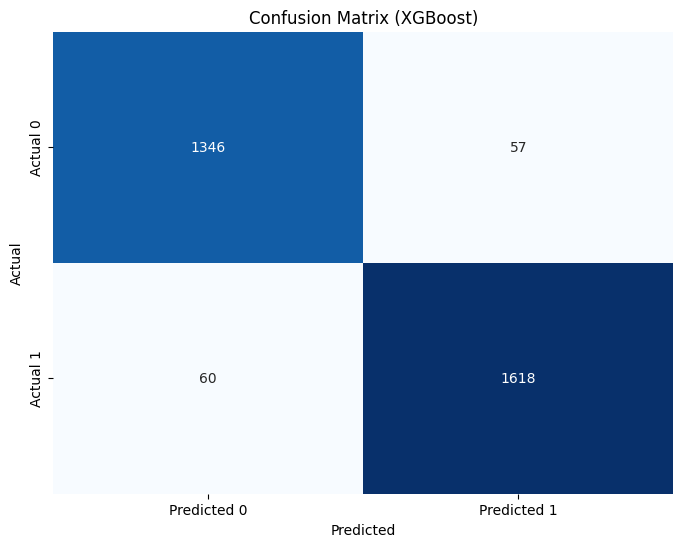

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1403
           1       0.97      0.96      0.97      1678

    accuracy                           0.96      3081
   macro avg       0.96      0.96      0.96      3081
weighted avg       0.96      0.96      0.96      3081



In [25]:
# XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Predict on the test set
xgb_y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("Accuracy:", xgb_accuracy)

# Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
print("Confusion Matrix:")
# print(xgb_conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost)")
plt.show()

# Classification Report
xgb_class_report = classification_report(y_test, xgb_y_pred)
print("Classification Report (XGBoost):")
print(xgb_class_report)

In [26]:
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the evaluation metrics
scoring = {
    'acc': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc',
    'log_loss': 'neg_log_loss'
}

# Perform cross-validation
xgb_scores = cross_validate(xgb_clf, X, y, scoring=scoring, cv=kf, return_train_score=True)

# Print the keys and test scores
print(xgb_scores.keys())
print("Accuracy for each fold:", xgb_scores['test_acc'])
print("Precision for each fold:", xgb_scores['test_precision'])
print("Recall for each fold:", xgb_scores['test_recall'])
print("F1-score for each fold:", xgb_scores['test_f1'])
print("ROC AUC for each fold:", xgb_scores['test_roc_auc'])
print("Log Loss for each fold:", -xgb_scores['test_log_loss'])

print("Average Accuracy:", xgb_scores['test_acc'].mean())
print("Average Precision:", xgb_scores['test_precision'].mean())
print("Average Recall:", xgb_scores['test_recall'].mean())
print("Average F1-score:", xgb_scores['test_f1'].mean())
print("Average ROC AUC:", xgb_scores['test_roc_auc'].mean())
print("Average Log Loss:", -xgb_scores['test_log_loss'].mean())



dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1', 'test_roc_auc', 'train_roc_auc', 'test_log_loss', 'train_log_loss'])
Accuracy for each fold: [0.96267446 0.95942876 0.96266234 0.96071429 0.96103896]
Precision for each fold: [0.96221081 0.9592808  0.96160889 0.96006159 0.96073684]
Recall for each fold: [0.96257912 0.95903537 0.96317633 0.96111064 0.96091502]
F1-score for each fold: [0.96238989 0.95915551 0.96231664 0.96052192 0.96082428]
ROC AUC for each fold: [0.99352167 0.99380675 0.99506966 0.9940336  0.99502448]
Log Loss for each fold: [0.11104269 0.10743722 0.10189459 0.11084793 0.10146657]
Average Accuracy: 0.9613037595316076
Average Precision: 0.9607797845772417
Average Recall: 0.9613632991772922
Average F1-score: 0.9610416487338572
Average ROC AUC: 0.9942912303292296
Average Log Loss: 0.10653779887518308


Evaluation of XGBoost: 

Precision: 0.9659701492537314
Recall (Sensitivity): 0.964243146603099
F1-score: 0.9651058753355204
ROC AUC: 0.9940706828633008
Average Precision: 0.9952204472674671
Log Loss: 0.10826402686137067


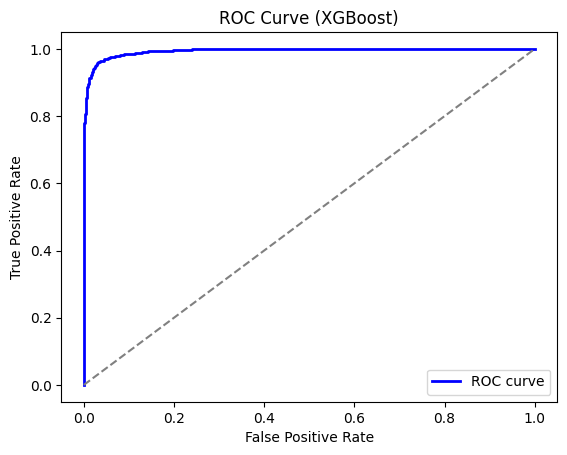

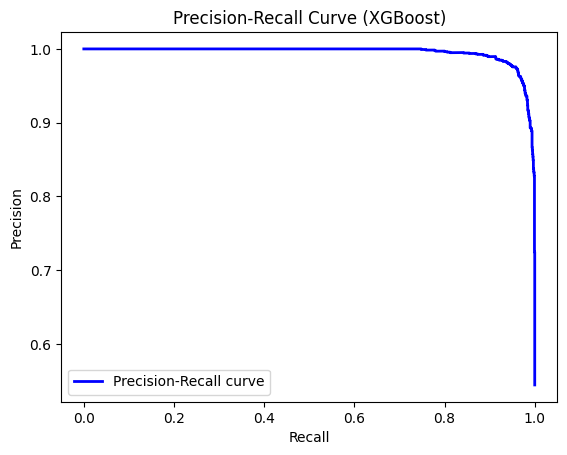

In [27]:

# evaluation
print("Evaluation of XGBoost: \n")

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve


precision = precision_score(y_test, xgb_y_pred)
recall = recall_score(y_test, xgb_y_pred)
f1 = f1_score(y_test, xgb_y_pred)
roc_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
average_precision = average_precision_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
logloss = log_loss(y_test, xgb_clf.predict_proba(X_test))


# Print the calculated metrics
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)
print("Log Loss:", logloss)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend(loc='lower left')
plt.show()

## ExtraTree Classifier

Accuracy: 0.9769555339175592

Confusion Matrix:


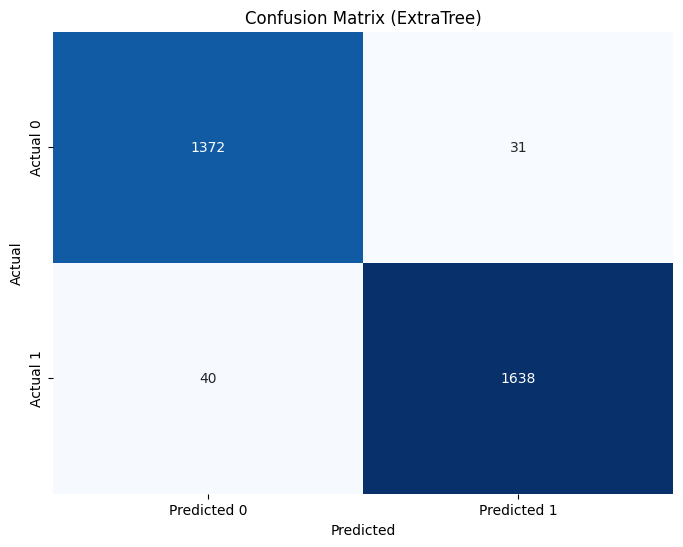


Classification Report (ExtraTree):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1403
           1       0.98      0.98      0.98      1678

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081



In [28]:
# extra tree

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assuming you have already loaded and split your data into X_train, X_test, y_train, y_test

# Initialize ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier
extra_trees_clf.fit(X_train, y_train)

# Predict on the test set
extra_trees_y_pred = extra_trees_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, extra_trees_y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
extra_trees_conf_matrix = confusion_matrix(y_test, extra_trees_y_pred)
print("\nConfusion Matrix:")
# print(extra_trees_conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(extra_trees_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (ExtraTree)")
plt.show()

# Classification Report
extra_trees_class_report = classification_report(y_test, extra_trees_y_pred)
print("\nClassification Report (ExtraTree):")
print(extra_trees_class_report)


In [29]:
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the evaluation metrics
scoring = {
    'acc': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'roc_auc': 'roc_auc',
    'log_loss': 'neg_log_loss'
}

# Perform cross-validation
extra_tree_scores = cross_validate(extra_trees_clf, X, y, scoring=scoring, cv=kf, return_train_score=True)

# Print the keys and test scores
print(extra_tree_scores.keys())
print("Accuracy for each fold:", extra_tree_scores['test_acc'])
print("Precision for each fold:", extra_tree_scores['test_precision'])
print("Recall for each fold:", extra_tree_scores['test_recall'])
print("F1-score for each fold:", extra_tree_scores['test_f1'])
print("ROC AUC for each fold:", extra_tree_scores['test_roc_auc'])
print("Log Loss for each fold:", -extra_tree_scores['test_log_loss'])

print("Average Accuracy:", extra_tree_scores['test_acc'].mean())
print("Average Precision:", extra_tree_scores['test_precision'].mean())
print("Average Recall:", extra_tree_scores['test_recall'].mean())
print("Average F1-score:", extra_tree_scores['test_f1'].mean())
print("Average ROC AUC:", extra_tree_scores['test_roc_auc'].mean())
print("Average Log Loss:", -extra_tree_scores['test_log_loss'].mean())



dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1', 'test_roc_auc', 'train_roc_auc', 'test_log_loss', 'train_log_loss'])
Accuracy for each fold: [0.97695553 0.98279779 0.97824675 0.98246753 0.98051948]
Precision for each fold: [0.9765487  0.98236742 0.97709991 0.9817943  0.98003712]
Recall for each fold: [0.97703329 0.98307935 0.97934479 0.98322586 0.98090023]
F1-score for each fold: [0.97678247 0.9826997  0.97806154 0.98238875 0.98042675]
ROC AUC for each fold: [0.99827885 0.99895775 0.99892291 0.9988306  0.998717  ]
Log Loss for each fold: [0.15377949 0.14430729 0.15238847 0.15610947 0.14619461]
Average Accuracy: 0.9801974186151401
Average Precision: 0.9795694888120969
Average Recall: 0.9807167048723653
Average F1-score: 0.9800718417717078
Average ROC AUC: 0.9987414232272764
Average Log Loss: 0.15055586493656367


Evaluation of ExtraTree Classifier: 

Precision: 0.981426003594967
Recall (Sensitivity): 0.9761620977353993
F1-score: 0.978786973409023
ROC AUC: 0.9982788456882367
Average Precision: 0.9985045677275898
Log Loss: 0.15377948552082826


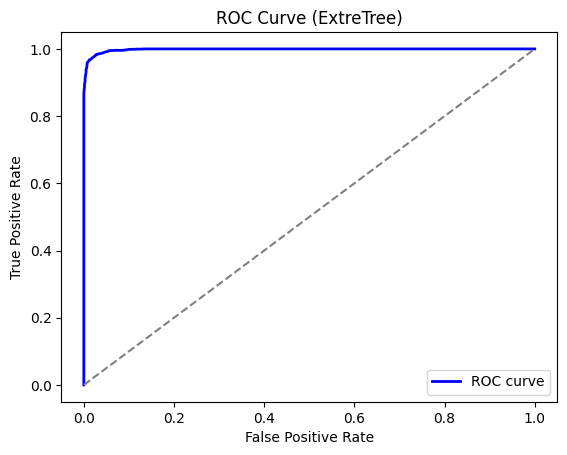

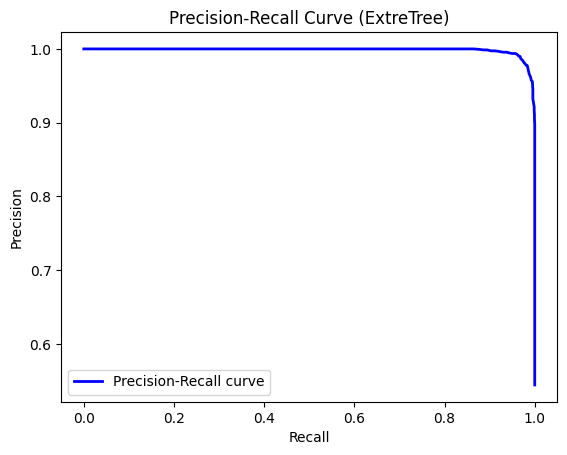

In [30]:

# evaluation
print("Evaluation of ExtraTree Classifier: \n")

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve


precision = precision_score(y_test, extra_trees_y_pred)
recall = recall_score(y_test, extra_trees_y_pred)
f1 = f1_score(y_test, extra_trees_y_pred)
roc_auc = roc_auc_score(y_test, extra_trees_clf.predict_proba(X_test)[:,1])
average_precision = average_precision_score(y_test, extra_trees_clf.predict_proba(X_test)[:,1])
logloss = log_loss(y_test, extra_trees_clf.predict_proba(X_test))


# Print the calculated metrics
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)
print("Log Loss:", logloss)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, extra_trees_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ExtreTree)')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, extra_trees_clf.predict_proba(X_test)[:,1])
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (ExtreTree)')
plt.legend(loc='lower left')
plt.show()

## stacking ensemble

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_base, X_meta, y_train_base, y_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Initialize base classifiers
base_classifiers = [('Random Forest', RandomForestClassifier()), 
                    ('LGBM', LGBMClassifier()), 
                    ('XGBoost', xgb.XGBClassifier()), 
                    ('ExtraTree', ExtraTreesClassifier())]

# Initialize meta-classifier
meta_classifier = LogisticRegression()

# Initialize stacking classifier
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train stacking classifier on the base training data
stacking_clf.fit(X_train_base, y_train_base)

# Make predictions using the meta-classifier on the meta testing data
stacking_preds = stacking_clf.predict(X_meta)

# Evaluate stacking classifier accuracy
stacking_accuracy = accuracy_score(y_meta, stacking_preds)
print("Stacking Classifier Accuracy:", stacking_accuracy)


[LightGBM] [Info] Number of positive: 3296, number of negative: 2864
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.045048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863892
[LightGBM] [Info] Number of data points in the train set: 6160, number of used features: 4200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535065 -> initscore=0.140490
[LightGBM] [Info] Start training from score 0.140490
[LightGBM] [Info] Number of positive: 2636, number of negative: 2292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.146100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861743
[LightGBM] [Info] Number of data points in the train set: 4928, number of used features: 4200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534903 -> initscore=0.139838
[LightGBM] [Info] Start training from score 0.139838
[LightGBM] [In

Evaluation of ExtraTree Classifier: 

Precision: 0.9693452380952381
Recall (Sensitivity): 0.9621861152141802
F1-score: 0.9657524091919941
ROC AUC: 0.9944016873901217
Average Precision: 0.9956331992444589
Log Loss: 0.09757533003787772


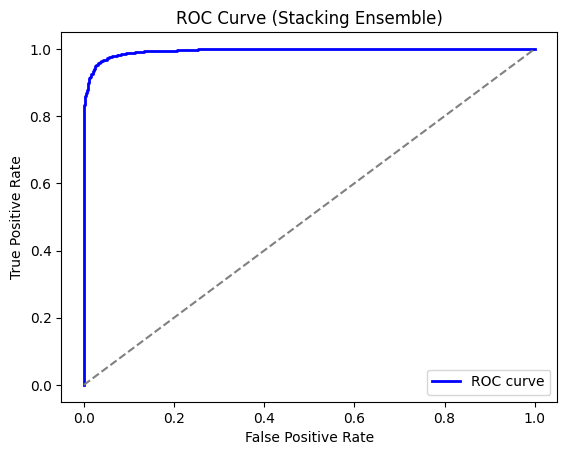

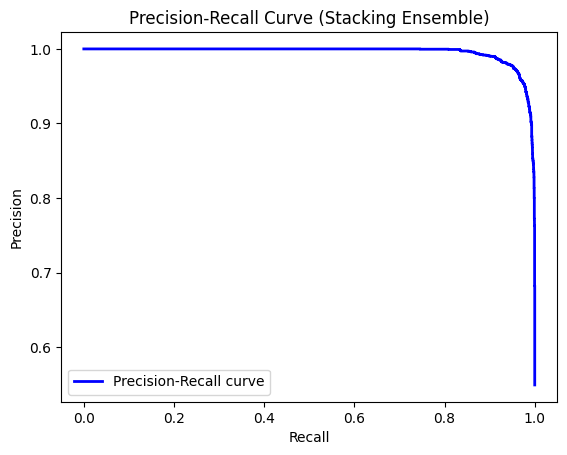

In [36]:
# evaluation
print("Evaluation of Stacking Ensemble: \n")

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve


precision = precision_score(y_meta, stacking_preds)
recall = recall_score(y_meta, stacking_preds)
f1 = f1_score(y_meta, stacking_preds)
roc_auc = roc_auc_score(y_meta, stacking_clf.predict_proba(X_meta)[:,1])
average_precision = average_precision_score(y_meta, stacking_clf.predict_proba(X_meta)[:,1])
logloss = log_loss(y_meta, stacking_clf.predict_proba(X_meta))


# Print the calculated metrics
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)
print("Log Loss:", logloss)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_meta, stacking_clf.predict_proba(X_meta)[:,1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Stacking Ensemble)')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_meta, stacking_clf.predict_proba(X_meta)[:,1])
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Stacking Ensemble)')
plt.legend(loc='lower left')
plt.show()

## Plots

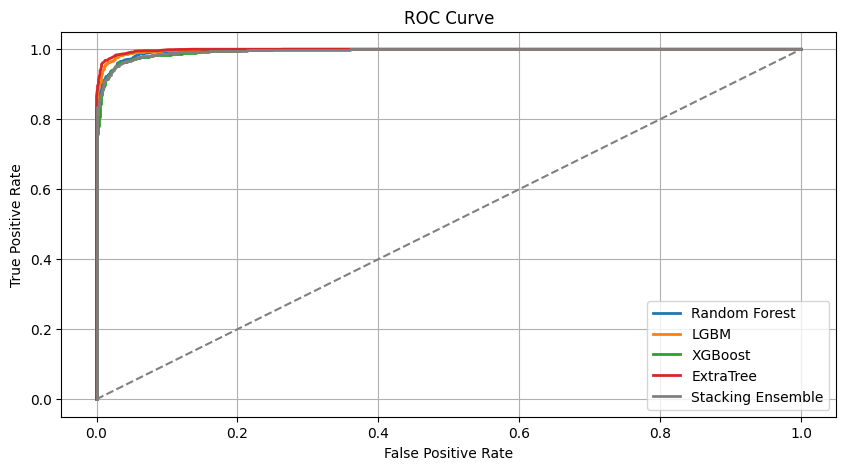

In [40]:
from sklearn.metrics import roc_curve, precision_recall_curve

# List of model names
model_names = ['Random Forest', 'LGBM',  'XGBoost', 'ExtraTree']

# List of model predictions
model_clfs = [rf_classifier, lgbm, xgb_clf, extra_trees_clf]

# Initialize plot for ROC curve
plt.figure(figsize=(10, 5))

# Plot ROC curve for each model
for model_name, model_clf in zip(model_names, model_clfs):
    fpr, tpr, thresholds = roc_curve(y_test, model_clf.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, lw=2, label=model_name)

fpr, tpr, thresholds = roc_curve(y_meta, stacking_clf.predict_proba(X_meta)[:,1])
plt.plot(fpr, tpr, color='grey', lw=2, label='Stacking Ensemble')


# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title for ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show ROC curve plot
plt.show()


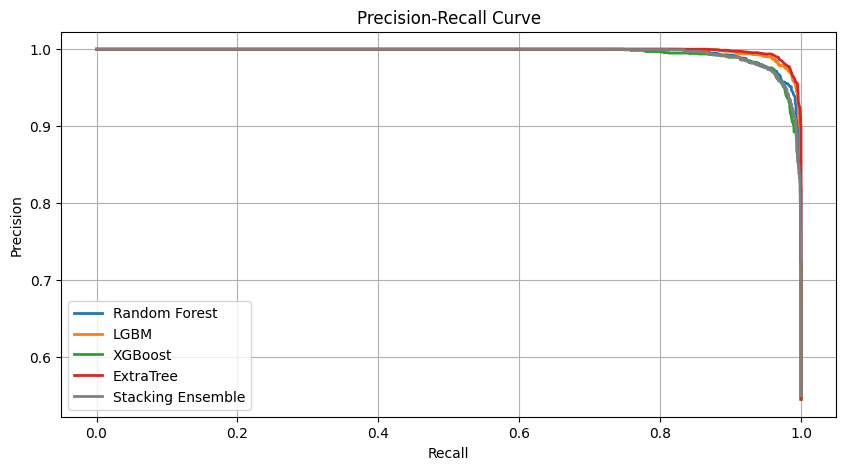

In [41]:
# Initialize plot for precision-recall curve
plt.figure(figsize=(10, 5))

# Plot precision-recall curve for each model
for model_name, model_clf in zip(model_names, model_clfs):
    precision, recall, thresholds = precision_recall_curve(y_test, model_clf.predict_proba(X_test)[:,1])
    plt.plot(recall, precision, lw=2, label=model_name)

precision, recall, thresholds = precision_recall_curve(y_meta, stacking_clf.predict_proba(X_meta)[:,1])
plt.plot(recall, precision, color='grey', lw=2, label='Stacking Ensemble')

# Set labels and title for precision-recall curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

# Show precision-recall curve plot
plt.show()


# Soft Voting + 10 fold cross validation (!!not done!!)

In [ ]:
# catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Initialize CatBoost classifier with some modified hyperparameters
cat_model = CatBoostClassifier(iterations=500,  # Increased number of iterations
                           learning_rate=0.05,  # Lower learning rate
                           depth=10,  # Increased depth of the trees
                           l2_leaf_reg=3,  # Regularization parameter
                           verbose=100)  # Print status every 100 iterations


# Fit the model
cat_history = cat_model.fit(X_train, y_train, verbose=False)

# Predictions
cat_y_pred = cat_model.predict(X_test)

# Confusion Matrix
cat_conf_matrix = confusion_matrix(y_test, cat_y_pred)
print("\nConfusion Matrix:")
# print(extra_trees_conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cat_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (CatBoost)")
plt.show()

# Classification Report
extra_trees_class_report = classification_report(y_test, cat_y_pred)
print("\nClassification Report (CatBoost):")
print(extra_trees_class_report)


In [ ]:
# evaluation catboost
from catboost import Pool
from catboost.utils import get_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


# ROC curve
cat_probabilities = cat_model.predict_proba(X_test)
fpr, tpr, _ = get_roc_curve(cat_model, Pool(X_test, label=y_test))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, cat_probabilities[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Feature Importance plot
feature_importance = cat_model.get_feature_importance(type='FeatureImportance')
feature_names = X.columns
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

# Learning Curve (if needed)
cat_model.plot_metric()
plt.show()


# Create a Pool object for the training data
train_pool = Pool(X_train, y_train)

# Partial Dependence Plot (PDP) - example for the first feature
cat_model.get_feature_importance(prettified=True)
plt.plot(cat_model.get_feature_statistics(train_pool, 'Feature 0')['FeatureValues'], 
         cat_model.get_feature_statistics(train_pool, 'Feature 0')['DependentValues'])
plt.xlabel('Feature 0')
plt.ylabel('Predicted Outcome')
plt.title('Partial Dependence Plot for Feature 0')
plt.show()


[LightGBM] [Info] Number of positive: 6681, number of negative: 5640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.808701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869617
[LightGBM] [Info] Number of data points in the train set: 12321, number of used features: 4200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542245 -> initscore=0.169384
[LightGBM] [Info] Start training from score 0.169384


c:\Users\sachl\Desktop\MLAI PROJECT\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:


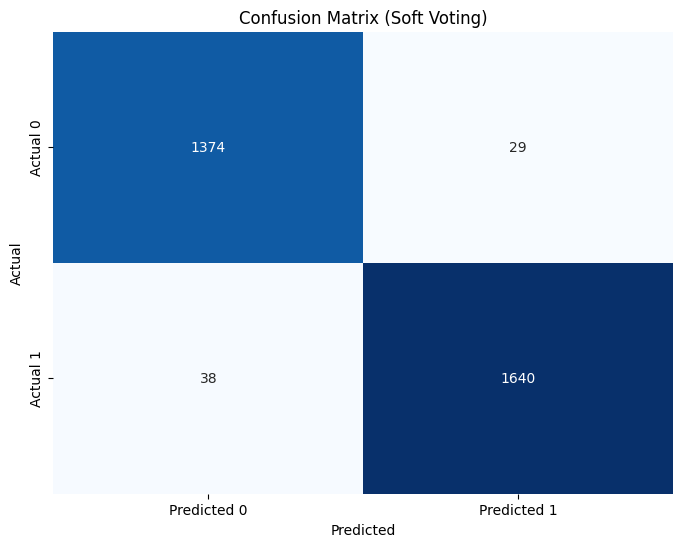


Classification Report (Soft Voting):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1403
           1       0.98      0.98      0.98      1678

    accuracy                           0.98      3081
   macro avg       0.98      0.98      0.98      3081
weighted avg       0.98      0.98      0.98      3081



In [157]:
# soft voting ensemble learning

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report


estimators = []

estimators.append(('rf', RandomForestClassifier(n_estimators=300, max_depth=50)))
#estimators.append(('gnb', GaussianNB() ))
#estimators.append(('lr', LogisticRegression(random_state=42) ))
estimators.append(('LGBM' , LGBMClassifier(n_estimators=500, random_state=42)))
estimators.append(('ada', AdaBoostClassifier(n_estimators=100, random_state=42) ))
estimators.append(('XGboost', xgb.XGBClassifier(objective='binary:logistic', random_state=42) ))
estimators.append(('extraTree', ExtraTreesClassifier(n_estimators=100, random_state=42) ))


# # Define the base classifiers
# gnb_classifier = GaussianNB()
# lr_classifier = LogisticRegression(random_state=42)
# #et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
# #lgbm = LGBMClassifier(n_estimators=500, random_state=42)
# adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)


# Create a Soft Voting Classifier
voting_classifier = VotingClassifier(estimators = estimators, voting='soft')

# Train the classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predict on the test data
voting_predictions = voting_classifier.predict(X_test)

# Generate confusion matrix
voting_conf_matrix = confusion_matrix(y_test, voting_predictions)
print("Confusion Matrix:")
# print(voting_conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(voting_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Soft Voting)")
plt.show()

# Generate classification report
voting_class_report = classification_report(y_test, voting_predictions)
print("\nClassification Report (Soft Voting):")
print(voting_class_report)


In [158]:
voting_class_Recall = recall_score(y_test, voting_predictions)
voting_class_Precision = precision_score(y_test, voting_predictions)
voting_class_f1 = f1_score(y_test, voting_predictions)
voting_class_accuracy = accuracy_score(y_test, voting_predictions)

In [159]:
# 10 fold using randomforest
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier # You can replace this with any other classifier you want to use


# Initialize KFold with 10 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(voting_classifier, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())


[LightGBM] [Info] Number of positive: 6681, number of negative: 5640
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.860095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 869617
[LightGBM] [Info] Number of data points in the train set: 12321, number of used features: 4200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542245 -> initscore=0.169384
[LightGBM] [Info] Start training from score 0.169384


c:\Users\sachl\Desktop\MLAI PROJECT\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
VC_soft_cv_score = cv_scores.mean()
VC_soft_cv_stdev = stdev(cv_scores)

voting_class_results = [(voting_class_Recall, voting_class_Precision, voting_class_f1, voting_class_accuracy, VC_soft_cv_score, VC_soft_cv_stdev)]


voting_class_score = pd.DataFrame(data = voting_class_results, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'Avg Soft Voting Acuracy', 'Standard Deviation of Soft Voting Accuracy'])
voting_class_score.insert(0, 'Voting Classifier', 'Soft Voting')
display(voting_class_score)

,Voting Classifier,Recall,Precision,F1 Score,Accuracy,Avg Soft Voting Acuracy,Standard Deviation of Soft Voting Accuracy
0,Soft Voting,0.464243,0.744742,0.571953,0.621551,0.967407,0.005806


In [ ]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, voting_predictions)
print(f"AUC-ROC Curve for Voting Classifier with soft voting: {ROCAUCscore:.4f}")

In [ ]:
y_proba = voting_classifier.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])

# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    voting_classifier, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Voting Classifier with soft voting")

c:\Users\sachl\Desktop\MLAI PROJECT\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5498 - loss: 0.6959 - val_accuracy: 0.5514 - val_loss: 0.6860
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5474 - loss: 0.6874 - val_accuracy: 0.5521 - val_loss: 0.6860
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5451 - loss: 0.6871 - val_accuracy: 0.5475 - val_loss: 0.6864
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5489 - loss: 0.6864 - val_accuracy: 0.5479 - val_loss: 0.6865
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5412 - loss: 0.6877 - val_accuracy: 0.5475 - val_loss: 0.6863
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5471 - loss: 0.6859 - val_accuracy: 0.5482 - val_loss: 0.6863
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5428 - loss: 0.6871 - val_accuracy: 0.5482 - val_loss: 0.6867
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5446 - loss: 0.6878 - val_acc

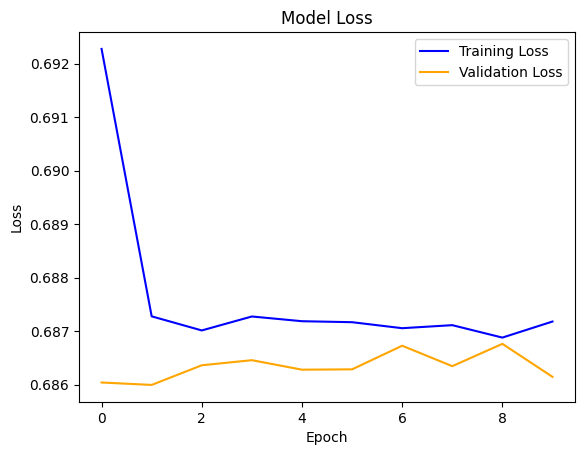

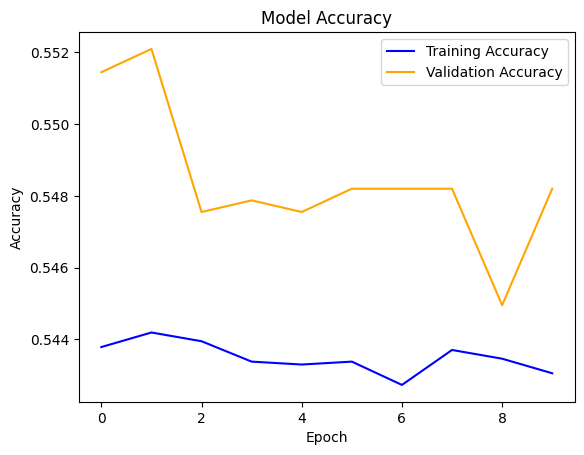

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5409 - loss: 0.6868
Loss: 0.6861464977264404
Accuracy: 0.5481986403465271


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [146]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Reshape input data into 3D tensor (samples, timesteps, features)
timesteps = 1  # Each row represents a timestep
n_features = X_train.shape[1]  # Number of features
X_train_reshape = X_train.values.reshape((X_train.shape[0], timesteps, n_features))
X_test_reshape = X_test.values.reshape((X_test.shape[0], timesteps, n_features))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(timesteps, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
lstm_history = lstm_model.fit(X_train_reshape, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshape, y_test), verbose=1)

# Plot training and validation loss
plt.plot(lstm_history.history['loss'], label='Training Loss', color='blue')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print('Loss:', lstm_loss)
print('Accuracy:', lstm_accuracy)

# Predict probabilities on test data
lstm_y_pred_prob = lstm_model.predict(X_test)

# Threshold probabilities to get predicted classes
lstm_y_pred = (lstm_y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstm_y_pred)
print('Confusion Matrix:')
print(lstm_conf_matrix)

# Compute classification report
lstm_class_report = classification_report(y_test, lstm_y_pred)
print('Classification Report:')
print(lstm_class_report)


# Extra code

In [ ]:
# # Encode the 'gender' column using LabelEncoder
# enc = LabelEncoder()

# # Assuming `combined_df` is your DataFrame containing columns from gender_0 to gender_99
# for i in range(100):  # Assuming you have 100 columns from gender_0 to gender_99
#     column_name = f'gender_{i}'  # Construct the column name
#     if column_name in combined_df.columns:
#         combined_df[column_name] = enc.fit_transform(combined_df[column_name])

# # Check the DataFrame after label encoding
# display(combined_df.head())

,participant_id_0,age_0,gender_0,key_press_count_0,delete_key_press_count_0,text_id_0,text_length_0,accelerometer_x_0,accelerometer_y_0,accelerometer_z_0,...,rotation_sensor_z_99,rotation_sensor_scalar_99,rotation_sensor_value_99,rotation_sensor_magnitude_99,orientation_azimuth_99,orientation_pitch_99,orientation_roll_99,orientation_sensor_magnitude_99,number_of_steps_99,stress
0,48.0,19.0,1,1.0,0.0,2.0,47.0,-0.1632,2.1094,9.5301,...,0.873417,0.478776,0.0,0.999999,237.51999,-9.42,3.83,237.73756,19447.0,0
1,48.0,19.0,1,9.0,3.0,2.0,47.0,0.5255,1.7001,9.0246,...,0.877669,0.46584,0.0,0.999999,236.18,-12.49,2.99,236.52892,19447.0,0
2,48.0,19.0,1,16.0,5.0,2.0,47.0,0.9013,2.2281,9.7232,...,0.880441,0.460004,0.0,0.999999,235.54999,-12.84,3.01,235.91888,19447.0,0
3,48.0,19.0,1,22.0,5.0,2.0,47.0,0.396,2.1716,9.5331,...,0.878422,0.465471,0.0,1.0,235.98999,-12.28,2.13,236.31888,19447.0,0
4,48.0,19.0,1,30.0,5.0,2.0,47.0,0.3489,2.0231,9.649099,...,0.881136,0.455288,0.0,1.0,235.0,-14.219999,3.54,235.45645,19447.0,0


In [ ]:
# # Print the mapping between original categorical values and numerical labels
# print("Mapping of original values to numerical labels:")
# for original_value, numerical_label in zip(enc.classes_, enc.transform(enc.classes_)):
#     print(f"{original_value}: {numerical_label}")

Mapping of original values to numerical labels:
Female: 0
Male: 1


In [ ]:
# # dropping target col and participant_id(0-99)
# col_drop = ["stress"]
# col_drop.extend([f"participant_id_{i}" for i in range(100)])

# X = combined_df.drop(col_drop, axis = 1)
# y = combined_df["stress"]



In [ ]:
# # pca
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

In [ ]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [ ]:
# print(combined_df["stress"].value_counts())

stress
0    865
1    865
Name: count, dtype: int64


In [ ]:
# split_shape = {"TRAINING": [X_train.shape,y_train.shape],
# #               "VALIDATING": [X_val.shape, y_val.shape],
#                "TESTING": [X_test.shape, y_test.shape]}

# split_shape_df = pd.DataFrame(split_shape, index=["X shape", "y shape"])
# display(split_shape_df)


,TRAINING,TESTING
X shape,"(1384, 1000)","(346, 1000)"
y shape,"(1384,)","(346,)"


In [ ]:
# # Random Forest

# # Create a Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the classifier on the training data
# rf_classifier.fit(X_train, y_train)

# # Predict on the test data
# predictions = rf_classifier.predict(X_test)

# # Evaluate the model
# accuracy = (predictions == y_test).mean()
# print("Accuracy:", accuracy)

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_test, predictions)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Generate classification report
# class_report = classification_report(y_test, predictions)
# print("\nClassification Report:")
# print(class_report)

Accuracy: 0.10115606936416185
Confusion Matrix:
[[ 14 172]
 [139  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.08      0.08       186
           1       0.11      0.13      0.12       160

    accuracy                           0.10       346
   macro avg       0.10      0.10      0.10       346
weighted avg       0.10      0.10      0.10       346



In [12]:
# # GNB gaussian

# from sklearn.naive_bayes import GaussianNB
# # Create a Gaussian Naive Bayes classifier
# gnb_classifier = GaussianNB()

# # Train the classifier on the training data
# gnb_classifier.fit(X_train, y_train)

# # Predict on the test data
# predictions = gnb_classifier.predict(X_test)

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_test, predictions)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Generate classification report
# class_report = classification_report(y_test, predictions)
# print("\nClassification Report:")
# print(class_report)

Confusion Matrix:
[[102169  39043]
 [100272  66591]]

Classification Report:
              precision    recall  f1-score   support

           C       0.50      0.72      0.59    141212
           S       0.63      0.40      0.49    166863

    accuracy                           0.55    308075
   macro avg       0.57      0.56      0.54    308075
weighted avg       0.57      0.55      0.54    308075



In [13]:
# # logistic regression

# from sklearn.linear_model import LogisticRegression

# # Create a Logistic Regression classifier
# log_reg_classifier = LogisticRegression()

# # Train the classifier on the training data
# log_reg_classifier.fit(X_train, y_train)

# # Predict on the test data
# predictions = log_reg_classifier.predict(X_test)

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_test, predictions)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Generate classification report
# class_report = classification_report(y_test, predictions)
# print("\nClassification Report:")
# print(class_report)

c:\Users\sachl\Desktop\MLAI PROJECT\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[ 24034 117178]
 [ 21383 145480]]

Classification Report:
              precision    recall  f1-score   support

           C       0.53      0.17      0.26    141212
           S       0.55      0.87      0.68    166863

    accuracy                           0.55    308075
   macro avg       0.54      0.52      0.47    308075
weighted avg       0.54      0.55      0.48    308075



In [14]:
# # soft voting ensemble learning

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import VotingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.datasets import load_iris
# from sklearn.metrics import confusion_matrix, classification_report


# # Define the base classifiers
# gnb_classifier = GaussianNB()
# lr_classifier = LogisticRegression(random_state=42)
# svm_classifier = SVC(probability=True, random_state=42)

# # Create a Soft Voting Classifier
# voting_classifier = VotingClassifier(estimators=[('dt', gnb_classifier), ('lr', lr_classifier), ('svm', svm_classifier)], voting='soft')

# # Train the classifier on the training data
# voting_classifier.fit(X_train, y_train)

# # Predict on the test data
# predictions = voting_classifier.predict(X_test)

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_test, predictions)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Generate classification report
# class_report = classification_report(y_test, predictions)
# print("\nClassification Report:")
# print(class_report)


c:\Users\sachl\Desktop\MLAI PROJECT\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# # PCA

# # PCA feature space plot

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.datasets import make_classification

# # Generate some synthetic classification data (replace this with your own data)
# #X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_clusters_per_class=1, random_state=42)

# # Perform PCA to reduce the dimensionality to 2
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# # Create a DataFrame for plotting
# #data = np.hstack((X_pca, y[:]))

# #df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# #df["Class"] = y

# # Plot the feature space
# #sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df, palette='bright', alpha=0.7)
# #plt.title('Feature Space after PCA')
# #plt.xlabel('Principal Component 1')
# #plt.ylabel('Principal Component 2')
# #plt.show()



# #pca = PCA(n_components=0.8)  # Choose the number of components to explain 95% of the variance
# #X_train_pca = pca.fit_transform(X_train)
# #X_val_pca = pca.transform(X_val)
# #X_test_pca = pca.transform(X_test)